# **Analytics 2 :** <font color=#DF4807>**Examination**</font>




# **Instructions:**

1. Run the code cell "Exam Settings" to start your exam and get your data.
2. You will be asked to enter your matriculation number. Enter it and press enter.

In [1]:
#@title Exam Settings
Run_to_start= "Run this code block to generate your data. DO NOT CHANGE or add anything to it." #@param {type:"string"}
#variable_name = 2

import pandas as pd
import random

url = 'https://drive.google.com/file/d/1ta1og_niPF_p_1_Rs3WB-qLdO133uUqF/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
colnames = ['id', 'text', 'rating']
df = pd.read_csv(dwn_url, encoding='latin-1', names=colnames)

#key in your student ID
studentID = int(input("Key in your matriculation number here -->"))

#get subset of data
df_sample = df.sample(n=6000, random_state=studentID)
df_sample.drop('id', axis=1, inplace=True)
df_sample = df_sample.reset_index(drop=True)

#get text
data = []
temp = df.sample(n=1, random_state=studentID)
data = temp['text']
pd.options.display.max_colwidth = len(data)
data = data.to_string(index=False)


In [2]:
# you have been given the following text:
data

'Since "Angels & Demons" depends on a split-second schedule and a ticking time bomb that could destroy the Vatican, it\'s a little distracting when the Camerlengo, a priest entrusted with the pope\'s duties between papacies, breaks into the locked enclave of the College of Cardinals and lectures them on centuries of church history. Advertisement These men, many of them elderly, may face death in minutes, which the Camerlengo knows. The Commander of the Swiss Guard thinks he can evacuate the Vatican and the hundreds of thousands of faithful waiting in St. Peter\'s Square in 15 minutes before an explosion vaporizes "a big chunk of Rome," but frankly we in the audience think a lot of monsignors back home are going to receive promotions real soon. Since very few plot details in the film are remotely plausible, including its desperate chase across Rome, the history lesson is excusable. Having been told about the long war between the church and the Illuminati, and religion and science, we ar

# **Part 1** (10 points)

**Apply the following steps to the data you have been given:**
1. Plot frequency of each PoS


[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


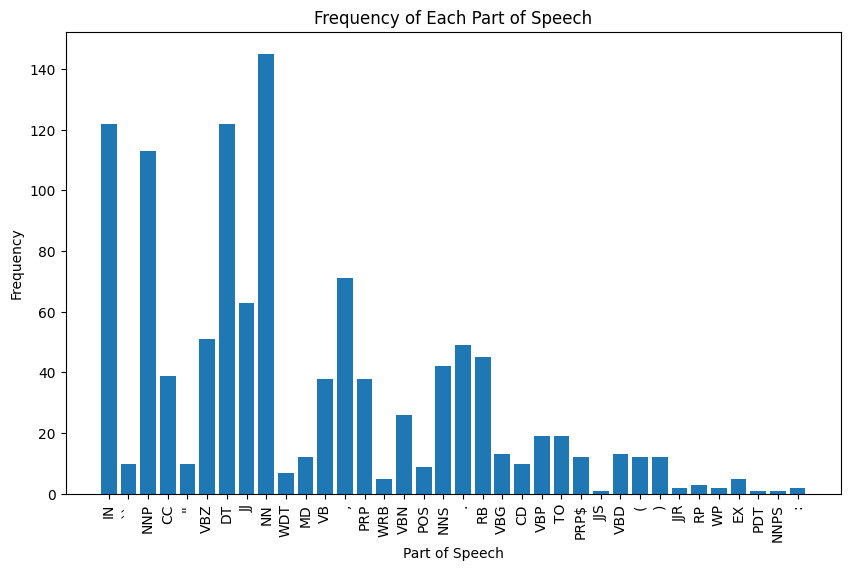

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt

# Sample text data
data = data

# Ensure that the necessary NLTK datasets are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenize the text and perform part of speech tagging
tokens = word_tokenize(data)
pos_tags = pos_tag(tokens)

# Count the frequency of each part of speech
pos_counts = Counter(tag for word, tag in pos_tags)

# Extracting parts of speech and their counts for plotting
parts_of_speech, counts = zip(*pos_counts.items())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(parts_of_speech, counts)
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Frequency of Each Part of Speech')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()



2. Do Named Entity Recognition and render a visualization. Please explain the result in your own words.


In [5]:
import spacy
from spacy import displacy
import en_core_web_sm

# Load the spaCy English model
nlp = en_core_web_sm.load()

# Your text data
text = data

# Process the text
doc = nlp(text)


displacy.render(doc, style='ent')




3. Do sentence segmentation, i.e. seperate the text into sentences and return a list of sentences.

In [6]:
import spacy
import en_core_web_sm

# Load the spaCy English model
nlp = en_core_web_sm.load()

# Your text data
text = data

# Process the text
doc = nlp(text)

# Perform sentence segmentation
sentences = [sentence.text.strip() for sentence in doc.sents]

# Print the list of sentences
for sentence in sentences:
    print(sentence)

Since "Angels & Demons" depends on a split-second schedule and a ticking time bomb that could destroy the Vatican, it's a little distracting when the Camerlengo, a priest entrusted with the pope's duties between papacies, breaks into the locked enclave of the College of Cardinals and lectures them on centuries of church history.
Advertisement These men, many of them elderly, may face death in minutes, which the Camerlengo knows.
The Commander of the Swiss Guard thinks he can evacuate the Vatican and the hundreds of thousands of faithful waiting in St. Peter's Square in 15 minutes before an explosion vaporizes "a big chunk of Rome," but frankly we in the audience think a lot of monsignors back home are going to receive promotions real soon.
Since very few plot details in the film are remotely plausible, including its desperate chase across Rome, the history lesson is excusable.
Having been told about the long war between the church and the Illuminati, and religion and science, we are gr

4. Create a dictionary of key value pairs where keys are unique words in the text and values are the respective frequencies. The dictionary should not include stop words or punctuation.

In [7]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Your text data
text = data

# Process the text
doc = nlp(text)

# Create a dictionary of word frequencies, excluding stop words and punctuation
word_frequencies = Counter(
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and token.text.strip()
)

# Print the word frequencies
for word, freq in word_frequencies.items():
    print(f"{word}: {freq}")


angels: 3
demons: 3
depends: 1
split: 1
second: 1
schedule: 1
ticking: 1
time: 3
bomb: 1
destroy: 1
vatican: 8
little: 2
distracting: 1
camerlengo: 4
priest: 2
entrusted: 1
pope: 5
duties: 1
papacies: 1
breaks: 1
locked: 1
enclave: 1
college: 2
cardinals: 4
lectures: 1
centuries: 1
church: 7
history: 3
advertisement: 5
men: 1
elderly: 2
face: 2
death: 2
minutes: 2
knows: 1
commander: 2
swiss: 2
guard: 2
thinks: 1
evacuate: 1
hundreds: 1
thousands: 1
faithful: 2
waiting: 1
st.: 1
peter: 1
square: 1
15: 1
explosion: 1
vaporizes: 1
big: 1
chunk: 1
rome: 4
frankly: 1
audience: 1
think: 1
lot: 1
monsignors: 1
home: 1
going: 1
receive: 1
promotions: 1
real: 2
soon: 1
plot: 1
details: 1
film: 4
remotely: 1
plausible: 1
including: 1
desperate: 2
chase: 1
lesson: 1
excusable: 1
having: 1
told: 1
long: 2
war: 1
illuminati: 6
religion: 2
science: 3
grateful: 1
briefing: 1
know: 2
kind: 1
requires: 1
forgiving: 1
promises: 1
entertain: 1
succeeds: 1
based: 1
novel: 1
came: 1
davinci: 2
code: 2
dan

# **Part 2** (10 points)

**Apply the following steps to the data you have been given:**

5. Write a function that takes in your data as input and outputs:

  a. the 2 most similar words

  b. the distance between the words

  c. Note: the two words returned by your function should not be identical.




In [8]:
import spacy
from itertools import combinations

def find_most_similar_words(text):
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the text
    doc = nlp(text)

    # Filter out stop words and punctuation, and ensure words have vectors
    words = [token for token in doc if not token.is_stop and not token.is_punct and token.has_vector]

    # Initialize variables to store the most similar words and their similarity
    most_similar = (None, None)
    highest_similarity = -1

    # Iterate through combinations of words to find the most similar pair
    for word1, word2 in combinations(words, 2):
        similarity = word1.similarity(word2)
        if similarity > highest_similarity and word1.text.lower() != word2.text.lower():
            highest_similarity = similarity
            most_similar = (word1.text, word2.text)

    return most_similar, highest_similarity

# Example usage
# Replace 'your_text_here' with your actual text data
text = data
similar_words, similarity = find_most_similar_words(text)
print(f"Most similar words: {similar_words}")
print(f"Similarity: {similarity}")


/var/folders/gk/bq66snnn7bgfzcpdnrqsh9tc0000gn/T/ipykernel_55977/2200678098.py:20: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = word1.similarity(word2)


Most similar words: ('Peter', 'Brown')
Similarity: 0.899592399597168


6. Use a hugging face pipeline to get the summary of the text, then calculate the similarity between the original text and the summary.


In [9]:
!pip3 install transformers sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 2.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 12.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 12.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.6 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.5/167.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.4/425.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━

In [11]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util

def summarize_text(text, max_length=1024, min_length=30):
    # Initialize the Hugging Face summarization pipeline
    summarizer = pipeline("summarization")

    # Split the text into chunks if it's too long
    chunks = [text[i:i+max_length] for i in range(0, len(text), max_length)]

    # Summarize each chunk
    summaries = [summarizer(chunk, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text'] for chunk in chunks]

    # Combine the summaries
    combined_summary = ' '.join(summaries)

    return combined_summary

def calculate_similarity(text1, text2):
    # Load a pre-trained sentence transformer model for similarity calculation
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Embed both texts
    embeddings = model.encode([text1, text2])

    # Calculate cosine similarity
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

    return similarity

# Your text data
text = data

# Summarize the text
summary = summarize_text(text)

# Calculate similarity between the original text and the summary
similarity = calculate_similarity(text, summary)

print("Summary:")
print(summary)
print("\nSimilarity between original text and summary:")
print(similarity)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 1024, but your input_length is only 210. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=105)
Your max_length is set to 1024, but your input_length is only 242. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=121)
Your max_length is set to 1024, but your input_length is only 234. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=117)
Your 

Summary:
 "Angels & Demons" depends on a split-second schedule and a ticking time bomb that could destroy the Vatican . It's a little distracting when a priest breaks into the locked enclave of the College of Cardinals and lectures them on centuries of church history .  "Angels & Demons" is based on a novel that came before "The DaVinci Code" in Dan Brown's oeuvre . This kind of film requires us to be very forgiving, and if we are, it promises to entertain .  Langdon uses his knowledge of Illuminati symbols to follow the trail though four Rome churches . He spots and correctly identifies every clue, even though they're very well-hidden . Langdon has uncanny luck. Just as well, because one dungeon overlooked or one statue pointing the wrong way .  There is intrigue within the Vatican and lots of red herrings among all the red hats . The young Camerlengo (Ewan McGregor) joins the professor's desperate quest .  The film by no means tilts the conflict between science and religion one way o


### **Intuition**
---
7. In this cell explain which distance measure you used in task 6 and why.


In Task 6, I used cosine similarity to measure the distance between the original text and its summary. Cosine similarity is a popular choice in natural language processing because:

1.Measures Orientation, Not Magnitude: It focuses on the angle between two vectors, making it effective for comparing the similarity in the direction of the text embeddings, irrespective of their length.

2.Suitable for High-Dimensional Spaces: It works well with word embeddings which are often high-dimensional, capturing the nuanced semantic similarities between texts.

3.Effective for Variable Length Texts: Ideal for comparing texts of different lengths, like an original text and its summary, as it’s based on the orientation of vectors rather than their size.

In essence, cosine similarity is chosen for its ability to robustly compare the semantic similarity of texts in a multi-dimensional space, making it well-suited for tasks like summarization comparison.

---



# **Part 3** (30 points)
You have also been given "df_sample" which is a dataset of movie reviews. You can view the structure of the data by running the next cell.

In [12]:
df_sample.head()

text  \
0  Since "Angels & Demons" depends on a split-second schedule and a ticking time bomb that could destroy the Vatican, it's a little distracting when the Camerlengo, a priest entrusted with the pope's duties between papacies, breaks into the locked enclave of the College of Cardinals and lectures them on centuries of church history. Advertisement These men, many of them elderly, may face death in minutes, which the Camerlengo knows. The Commander of the Swiss Guard thinks he can evacuate the Vatican and the hundreds of thousands of faithful waiting in St. Peter's Square in 15 minutes before an explosion vaporizes "a big chunk of Rome," but frankly we in the audience think a lot of monsignors back home are going to receive promotions real soon. Since very few plot details in the film are remotely plausible, including its desperate chase across Rome, the history lesson is excusable. Having been told about the long war between the church and the Illuminati, and religion and science, we are grateful for the briefing, even if the cardinals already know most of the history. This kind of film requires us to be very forgiving, and if we are, it promises to entertain. "Angels & Demons" succeeds. It's based on a novel that came before "The DaVinci Code" in Dan Brown's oeuvre. Prof. Robert Langdon (Tom Hanks) is at Harvard when he is summoned from a swimming pool by an emissary from the Vatican, and flown to Rome to face a crisis. Earlier, we learned, a rare, sealed vial of anti-matter was stolen from the CERN Large Hadron Collider in Geneva, and a note taking credit comes from the Illuminati, a secret society that has long hated the Catholic Church because of the days when it persecuted Galileo and other scientists. Advertisement A "popular and progressive" pope has just died. The cardinals have been summoned to elect his successor. Four of them, the preferati, the favorites to be next pope, have been kidnapped. They will be executed in succession at 8, 9, 10 and 11 p.m., until the battery on the anti-matter vial runs out of juice at midnight and the faithful will see more than a puff of white smoke above the Vatican. I don't recall if the Illuminati had any demands. Maybe it just wants revenge. In that case, why hide the vial at the end of a trail that can only be followed by clues discovered or intuited by Professor Langdon? Why not just blow up the place? What is the purpose of the scavenger hunt? Has it all been laboriously constructed as a test of Langdon's awesome knowledge? Are the Illuminati trying to get even after Langdon foiled Opus Dei, another secret society, in "The DaVinci Code"? I don't know, and, reader, there is no time to care. Langdon uses his knowledge of Illuminati symbols to follow the trail though four Rome churches. He has uncanny luck. He spots and correctly identifies every clue, even though they're very well-hidden. Just as well, because one dungeon overlooked or one statue pointing the wrong way, and he loses. For his companion, Langdon has the beautiful and brilliant Vittoria Vetra (Ayelet Zurer) from CERN. Her father was murdered in the anti-matter theft. Her purpose is (a) to explain that the battery will indeed run down, (b) request her father's secret journals from Geneva, although they are never read, and (c) run along everywhere with Tom Hanks, to provide him with urgent conversation. Advertisement Meanwhile, there is intrigue within the Vatican and lots of red herrings among all the red hats. The young Camerlengo (Ewan McGregor), the adopted son of the late pontiff, joins the professor's desperate quest, as does the commander (Stellan Skarsgard) of the pope's protectors, the Swiss Guard. Inside the conclave, Cardinal Strauss (Armin Mueller-Stahl) is in charge of the election. Because of his sinister mien (I love the phrase sinister mien), German accent and absolutist views on church tradition, he seems set up to be a suspect, since the progressive pope's death may have been an inside job. (I f

In [17]:
df_sample.head(3)

text  \
0  Since "Angels & Demons" depends on a split-second schedule and a ticking time bomb that could destroy the Vatican, it's a little distracting when the Camerlengo, a priest entrusted with the pope's duties between papacies, breaks into the locked enclave of the College of Cardinals and lectures them on centuries of church history. Advertisement These men, many of them elderly, may face death in minutes, which the Camerlengo knows. The Commander of the Swiss Guard thinks he can evacuate the Vatican and the hundreds of thousands of faithful waiting in St. Peter's Square in 15 minutes before an explosion vaporizes "a big chunk of Rome," but frankly we in the audience think a lot of monsignors back home are going to receive promotions real soon. Since very few plot details in the film are remotely plausible, including its desperate chase across Rome, the history lesson is excusable. Having been told about the long war between the church and the Illuminati, and religion and science, we are grateful for the briefing, even if the cardinals already know most of the history. This kind of film requires us to be very forgiving, and if we are, it promises to entertain. "Angels & Demons" succeeds. It's based on a novel that came before "The DaVinci Code" in Dan Brown's oeuvre. Prof. Robert Langdon (Tom Hanks) is at Harvard when he is summoned from a swimming pool by an emissary from the Vatican, and flown to Rome to face a crisis. Earlier, we learned, a rare, sealed vial of anti-matter was stolen from the CERN Large Hadron Collider in Geneva, and a note taking credit comes from the Illuminati, a secret society that has long hated the Catholic Church because of the days when it persecuted Galileo and other scientists. Advertisement A "popular and progressive" pope has just died. The cardinals have been summoned to elect his successor. Four of them, the preferati, the favorites to be next pope, have been kidnapped. They will be executed in succession at 8, 9, 10 and 11 p.m., until the battery on the anti-matter vial runs out of juice at midnight and the faithful will see more than a puff of white smoke above the Vatican. I don't recall if the Illuminati had any demands. Maybe it just wants revenge. In that case, why hide the vial at the end of a trail that can only be followed by clues discovered or intuited by Professor Langdon? Why not just blow up the place? What is the purpose of the scavenger hunt? Has it all been laboriously constructed as a test of Langdon's awesome knowledge? Are the Illuminati trying to get even after Langdon foiled Opus Dei, another secret society, in "The DaVinci Code"? I don't know, and, reader, there is no time to care. Langdon uses his knowledge of Illuminati symbols to follow the trail though four Rome churches. He has uncanny luck. He spots and correctly identifies every clue, even though they're very well-hidden. Just as well, because one dungeon overlooked or one statue pointing the wrong way, and he loses. For his companion, Langdon has the beautiful and brilliant Vittoria Vetra (Ayelet Zurer) from CERN. Her father was murdered in the anti-matter theft. Her purpose is (a) to explain that the battery will indeed run down, (b) request her father's secret journals from Geneva, although they are never read, and (c) run along everywhere with Tom Hanks, to provide him with urgent conversation. Advertisement Meanwhile, there is intrigue within the Vatican and lots of red herrings among all the red hats. The young Camerlengo (Ewan McGregor), the adopted son of the late pontiff, joins the professor's desperate quest, as does the commander (Stellan Skarsgard) of the pope's protectors, the Swiss Guard. Inside the conclave, Cardinal Strauss (Armin Mueller-Stahl) is in charge of the election. Because of his sinister mien (I love the phrase sinister mien), German accent and absolutist views on church tradition, he seems set up to be a suspect, since the progressive pope's death may have been an inside job. (I f



8. Given data set "df_sample" your next task is to classify the reviews based on rating. You should fit the following three models:

  a. naive bayes using bag of words model

  b. naive bayes with normalized bag of words model

  c. naive bayes with normalized bag of words + new features

For each model, you should plot the roc_curve (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) in a single figure.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        54
           2       0.51      0.67      0.58       433
           3       0.45      0.36      0.40       373
           4       0.53      0.56      0.54       317

    accuracy                           0.50      1200
   macro avg       0.30      0.32      0.30      1200
weighted avg       0.46      0.50      0.48      1200



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

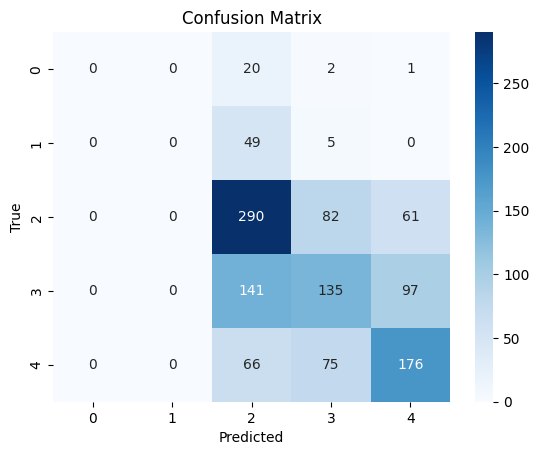

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = df_sample

# Selecting the feature and target columns
X = df['text']  # Replace 'Review' with the actual name of your review column
y = df['rating'].round().astype(int)  # Replace 'Rating' with the actual name of your rating column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bag of Words model using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_counts)

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        54
           2       0.51      0.67      0.58       433
           3       0.45      0.36      0.40       373
           4       0.53      0.56      0.54       317

    accuracy                           0.50      1200
   macro avg       0.30      0.32      0.30      1200
weighted avg       0.46      0.50      0.48      1200



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

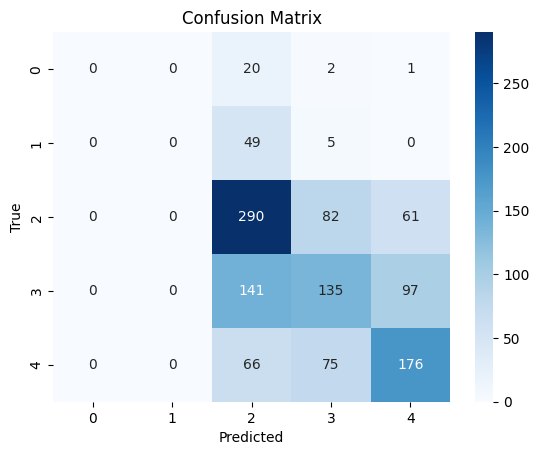

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = df_sample

# Convert ratings to discrete classes
df['rating'] = df['rating'].round().astype(int)

# Selecting the feature and target columns
X = df['text']  # Replace 'Review' with your column name
y = df['rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bag of Words model using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_counts)

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


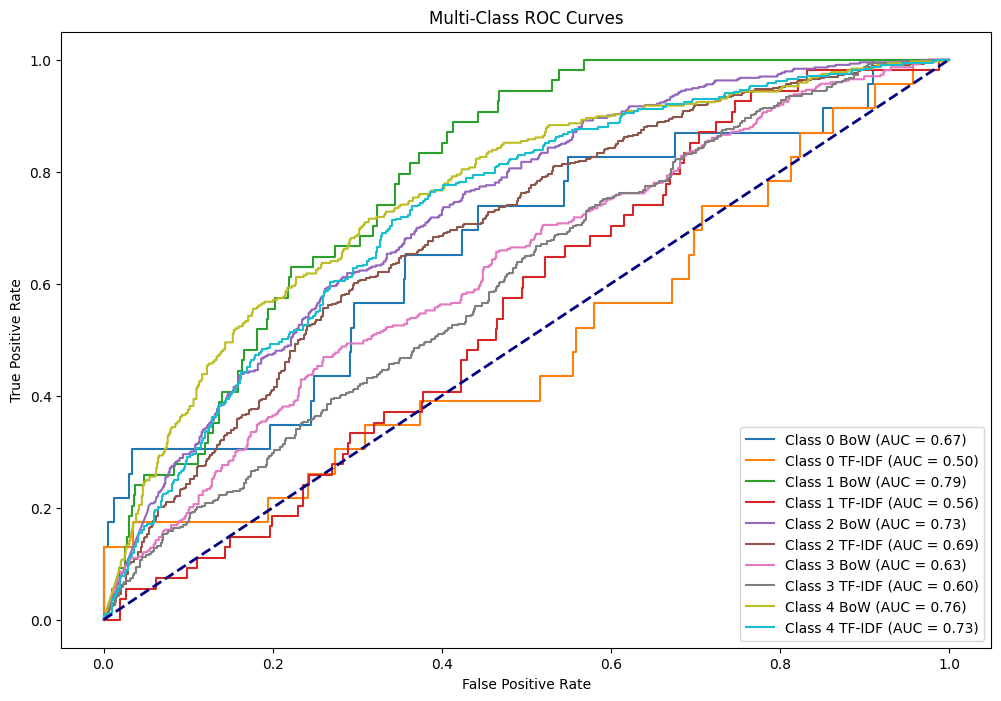

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

df = df_sample

# Convert ratings to discrete classes
df['rating'] = df['rating'].round().astype(int)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['rating'], test_size=0.2, random_state=42)

# Binarize y_test for ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(df['rating']))
n_classes = y_test_binarized.shape[1]

# Function to train model and compute ROC for each class
def compute_roc_auc(vectorizer, X_train, X_test, y_train, y_test, y_test_binarized):
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    y_score = clf.predict_proba(X_test_vec)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

# Compute ROC AUC for each model
fpr_bow, tpr_bow, roc_auc_bow = compute_roc_auc(CountVectorizer(), X_train, X_test, y_train, y_test, y_test_binarized)
fpr_tfidf, tpr_tfidf, roc_auc_tfidf = compute_roc_auc(TfidfVectorizer(), X_train, X_test, y_train, y_test, y_test_binarized)

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr_bow[i], tpr_bow[i], label=f'Class {i} BoW (AUC = {roc_auc_bow[i]:.2f})')
    plt.plot(fpr_tfidf[i], tpr_tfidf[i], label=f'Class {i} TF-IDF (AUC = {roc_auc_tfidf[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves')
plt.legend(loc="lower right")
plt.show()




### **Intuition**
---
9. In this cell explain what the figure shows and why you think a certain model outperformed another.

  Solution for task 9:


The AUC values are indicators of model performance, with 1 being perfect discrimination, 0.5 being no better than random, and values below 0.5 indicating worse-than-random predictions. From the AUC values given in the legend, we can infer the following:

1. **Class 1 BoW (AUC = 0.79)**: This model performed the best among all the models shown. The BoW method for Class 1 was particularly effective at distinguishing between Class 1 and not-Class 1.

2. **Class 0 TF-IDF (AUC = 0.50)**: This model performed similarly to a random classifier. The TF-IDF method for Class 0 did not provide a good distinction between Class 0 and other classes.

3. **Overall Performance**: It seems that the BoW model generally outperformed the TF-IDF model for most classes, as indicated by higher AUC values. This might suggest that the presence or absence of certain keywords (as captured by BoW) is more indicative of class membership than the relative importance of terms across the document corpus (as captured by TF-IDF).

The reason why one model might outperform another could be due to several factors:

- **BoW Sensitivity**: BoW is sensitive to the frequency of terms within documents, which could be crucial if certain keywords are very indicative of the class.
  
- **TF-IDF Normalization**: TF-IDF downplays words that are common across all documents, which might be less effective if those words are actually important for distinguishing certain classes.
  
- **Data Specificity**: The specific characteristics of the dataset could naturally favor one representation over the other. For example, shorter documents or documents with less varied vocabulary might be better suited to BoW.

In summary, the ROC curves and AUC values in this plot can be used to compare the effectiveness of different text representation techniques for classification tasks. The choice of technique can have a significant impact on model performance, and the best choice may depend on the nature of the text data and the specific requirements of the classification task.

---





# **Part 4**  (10 points)



10. In Part-3, you used a dataset of movie reviews. Please use the same dataset to answer following questions

  a. Import all the necessary libraries and perform text cleaning

  b. Perform Sentence tokenization

  c. Calculate the the sentence score and get the top 30% of sentences based on highest score.

  d. Explain the role of sentence score in text summarization.

  e. Get the summary of the dataset using the sentence score you got in Step 2.

In [29]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import heapq

# Ensure that the necessary NLTK datasets are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset

df = df_sample

# Text cleaning
def clean_text(text):
    # Remove stopwords, punctuation, and convert to lowercase
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

# Sentence tokenization
def tokenize_sentences(text):
    sentences = sent_tokenize(text)
    return sentences

# Calculate the sentence score based on word frequency
def score_sentences(sentences):
    vectorizer = CountVectorizer().fit(sentences)
    term_matrix = vectorizer.transform(sentences)
    term_freq = term_matrix.sum(axis=0)
    term_freq = term_freq.A1
    score_dict = {word: score for word, score in zip(vectorizer.get_feature_names_out(), term_freq)}
    
    sentence_scores = {}
    for sentence in sentences:
        for word in nltk.word_tokenize(sentence):
            if word in score_dict:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = score_dict[word]
                else:
                    sentence_scores[sentence] += score_dict[word]
    return sentence_scores

# Get the summary of the text using sentence scores
def get_summary(text, top_n=30):
    sentences = tokenize_sentences(text)
    sentence_scores = score_sentences(sentences)
    top_sentences = heapq.nlargest(top_n, sentence_scores, key=sentence_scores.get)
    summary = ' '.join(top_sentences)
    return summary

# Apply the functions to the dataset
df['Cleaned_Review'] = df['text'].apply(clean_text)
df['Sentences'] = df['Cleaned_Review'].apply(tokenize_sentences)
df['Sentence_Scores'] = df['Sentences'].apply(score_sentences)
df['Summary'] = df['Cleaned_Review'].apply(get_summary, top_n=int(len(df['Sentences']) * 0.3))

# Display the role of sentence score in text summarization
role_of_sentence_score = """
Sentence scoring in text summarization is about determining the importance of each sentence in the context of the entire text. Higher scores are assigned to sentences that contain a high frequency of significant words. The assumption is that these words carry the main themes and ideas of the text. Summarization is then achieved by selecting the sentences with the highest scores, thereby capturing the essence of the original text without needing to read it in its entirety.
"""

# Display the results
print(df[['text', 'Summary']].head())
print(role_of_sentence_score)


[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Part 5** (20 points)

11. Please use the same dataset of movie reviews to answer following questions

    a. Build the LSTM model using "Relu" as activation function in the dense layer and "Softmax" as activation function in "final layer".

    b. Print the summary of the model

    c. Train the model with 50 epochs


In [30]:
!pip3 install tensorflow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic-core 2.14.3 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.5.1 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.


In [31]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the dataset

df = df_sample

# Preprocessing the text: Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
max_sequence_length = max(len(x) for x in sequences)
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=max_sequence_length)

# Preparing the target and splitting the dataset
labels = df['rating'].values - 1  # Assuming the rating starts from 1
categorical_labels = to_categorical(labels, num_classes=max(df['rating']))
X_train, X_test, y_train, y_test = train_test_split(data, categorical_labels, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(max(df['rating']), activation='softmax'))  # Assuming 'Rating' is a column with integer labels

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5068, 128)         13399296  
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 13453124 (51.32 MB)
Trainable params: 13453124 (51.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
150/150 [==============================] - 299s 2s/step - loss: 1.2530 - accuracy: 0.3698 - val_loss: 1.1626 - val_accuracy: 0.4400
Epo